### Data
Local population density <br>
Dataset ID `141ef6ab-eed9-4081-8066-7be364a48af0` <br>
urlTemplate `/api/v1/widget_datapoints/${region.gid_2}/locdensity/` <br>


Preview region `EGY.14.3_1` <br>
url `https://waterpeacesecurity.org/api/v1/widget_datapoints/EGY.14.3_1/locdensity/` <br>

In [3]:
import numpy as np
import vega
import json
from vega import Vega

### Stand-alone specification
(eg for use with https://vega.github.io/editor/#/)

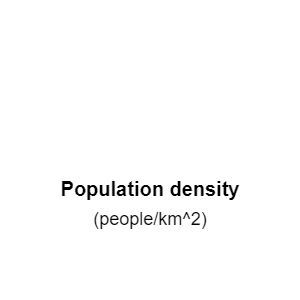

In [4]:
specV5=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "width": 300,
  "height": 300,
  "autosize": {
    "type": "none",
    "resize": true,
    "contains": "padding"
  },
  "signals": [
    {"name": "center", "update": "width / 2"}
  ],
  "data": [
    {
      "name": "widget_datapoints",
      "url": "https://waterpeacesecurity.org/api/v1/widget_datapoints/EGY.14.3_1/locdensity/",
      "format": {
        "property": "widget_datapoints",
        "type": "json",
        "parse": {
          "month_indep": "date:'%Y-%m-%d'"
        }
      },
      "transform": [
        {
          "type": "joinaggregate",
          "fields": ["month_indep"],
          "ops": ["max"],
          "as": ["max_month"]
        },
        {
          "type": "filter",
          "expr": "datum.month_indep == datum.max_month"
        },
        {
          "type": "formula",
          "as": "formatted",
          "expr": "format(datum.locdensity,'.4g')"
        }
      ]
    }
  ],
  "encode": {
    "enter": {
      "x": {"signal": "center"},
      "y": {"signal": "center"}
    }
  },

  "marks": [
    {
      "type": "text",
      "name": "my-label",
      "zindex": 1,
      "encode": {
        "enter": {
          "x": {"signal": "0"},
          "y": {"signal": "40"},
          "text": {"value": "Population density"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "black"},
          "fontWeight": {"value": "bold"},
          "fontSize": {"value": 20}
        }
      }
    },{
      "type": "text",
      "name": "my-units",
      "zindex": 1,
      "encode": {
        "enter": {
          "x": {"signal": "0"},
          "y": {"signal": "70"},
          "text": {"value": "(people/km^2)"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "black"},
          "fontWeight": {"value": "normal"},
          "fontSize": {"value": 18}
        }
      }
    },
    {
      "type": "text",
      "name": "my-value",
      "from": {"data": "widget_datapoints"},
      "zindex": 1,
      "encode": {
        "enter": {
          "x": {"signal": "0"},
          "y": {"signal": "-20"},
          "text": {"field": "formatted"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "black"},
          "fontWeight": {"value": "bold"},
          "fontSize": {"value": 80}
        }
      }
    }
  ]
}
""")
vega5view=dict(specV5)
Vega(vega5view)